# Exploratory Data Analysis (EDA) for Facial Expressions Dataset

This notebook provides a comprehensive EDA for the facial expressions image dataset. We will analyze class distributions, examine image characteristics, and visualize sample images from each emotion category.

In [ ]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import EDA utility functions
from src.eda_utils import (
    get_class_distribution,
    plot_class_distribution,
    show_sample_images,
    analyze_image_dimensions,
    analyze_color_distribution,
    analyze_pixel_distribution,
    combine_emotion_classes,
    plot_class_comparison, 
    find_blank_images
)

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set(style='whitegrid')

# Define paths
TRAIN_PATH = '../dataset/train'
TEST_PATH = '../dataset/test'

## 1. Dataset Overview

Let's first examine the structure of our dataset and count the number of images in each emotion category.

In [2]:
# Get distributions for train and test sets
train_dist = get_class_distribution(TRAIN_PATH)
test_dist = get_class_distribution(TEST_PATH)

# Create DataFrames for visualization
train_df = pd.DataFrame(list(train_dist.items()), columns=['Emotion', 'Count'])
test_df = pd.DataFrame(list(test_dist.items()), columns=['Emotion', 'Count'])

print("Training Set Distribution:")
print(train_df)
print("\nTest Set Distribution:")
print(test_df)

Training Set Distribution:
    Emotion  Count
0     angry   3995
1   disgust    436
2      fear   4097
3     happy   7215
4   neutral   4965
5       sad   4830
6  surprise   3171

Test Set Distribution:
    Emotion  Count
0     angry    958
1   disgust    111
2      fear   1024
3     happy   1774
4   neutral   1233
5       sad   1247
6  surprise    831


## 2. Visualizing Class Distribution

Let's visualize the distribution of images across different emotion categories.

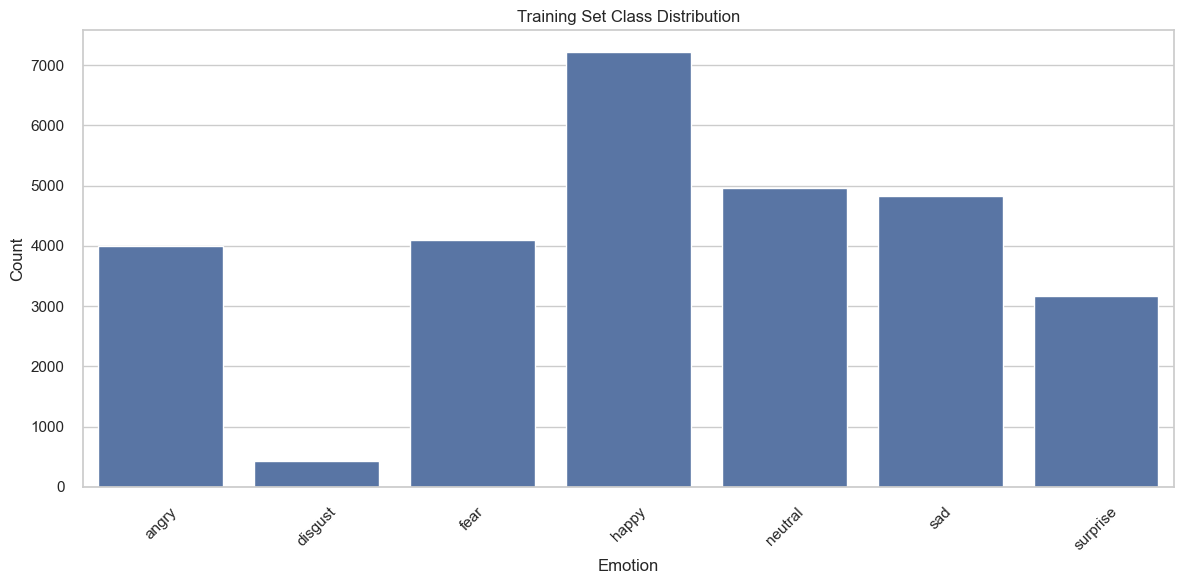

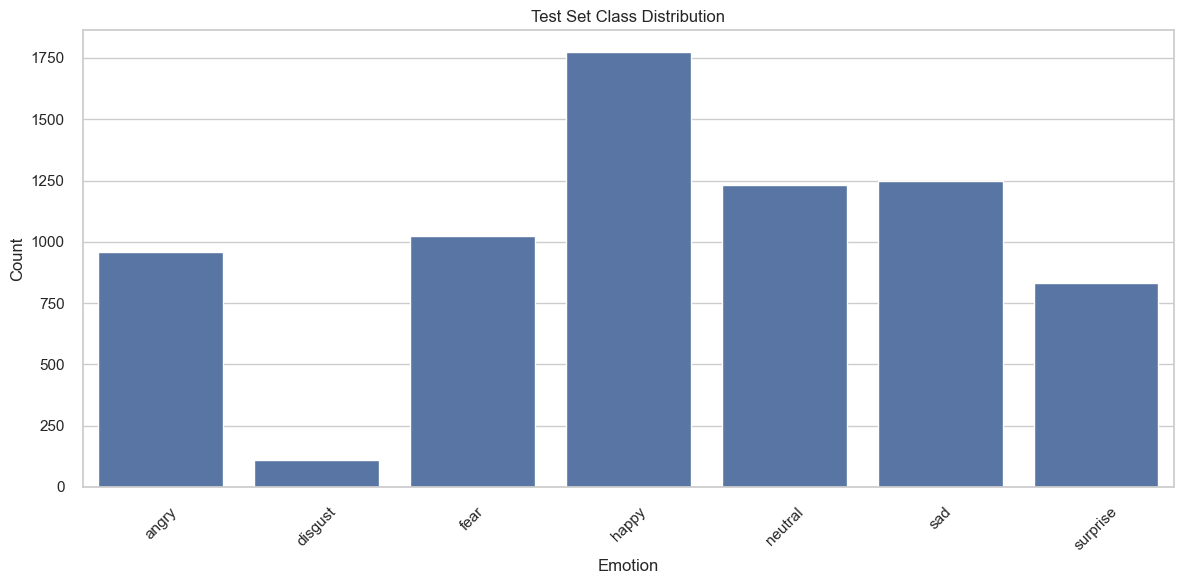

In [3]:
plot_class_distribution(train_df, 'Training Set Class Distribution')
plot_class_distribution(test_df, 'Test Set Class Distribution')

## 3. Image Analysis

Let's examine some sample images from each emotion category and analyze their characteristics.


ANGRY:


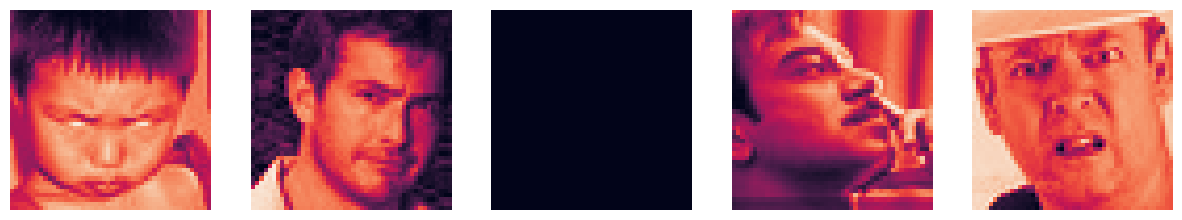


DISGUST:


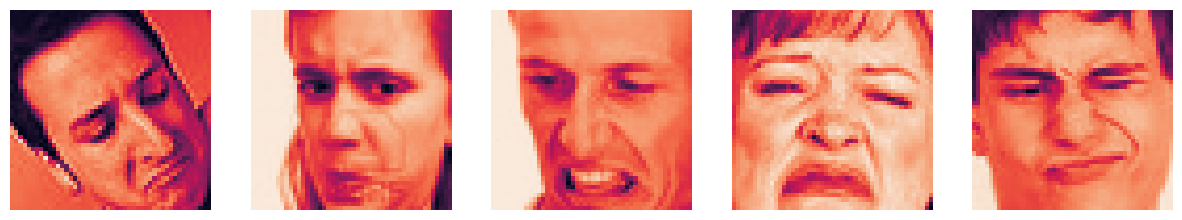


FEAR:


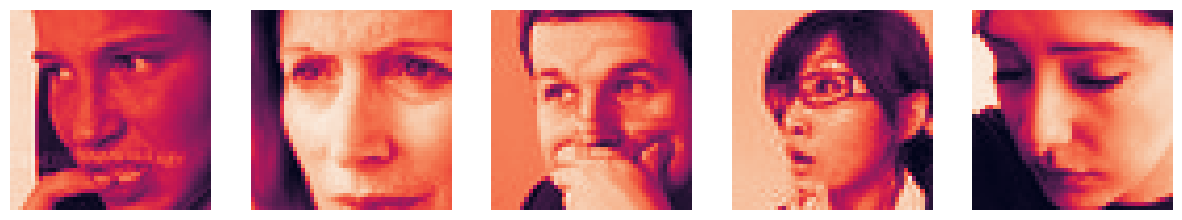


HAPPY:


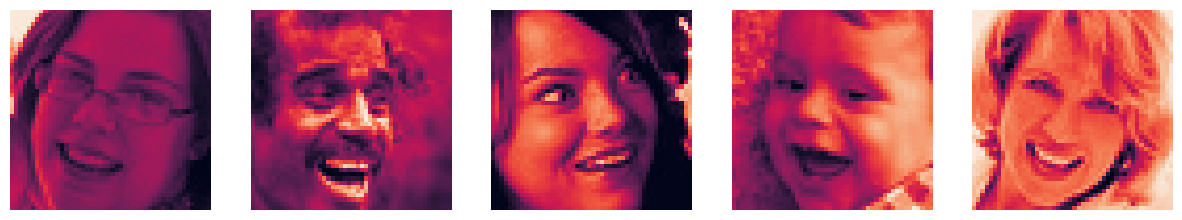


NEUTRAL:


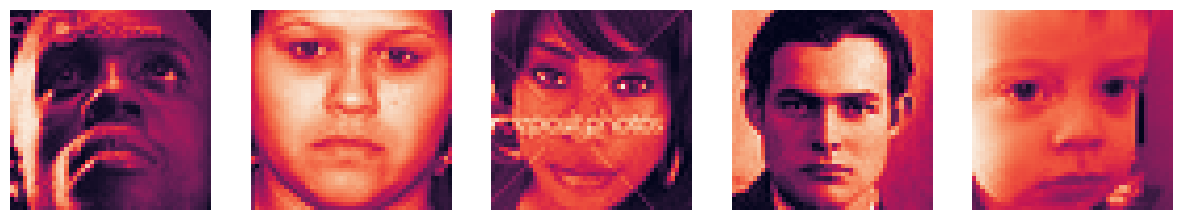


SAD:


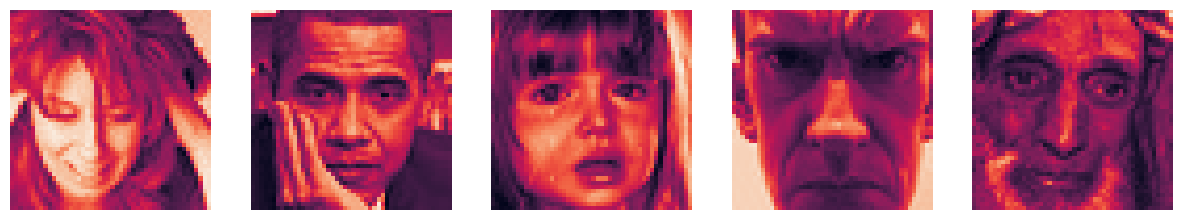


SURPRISE:


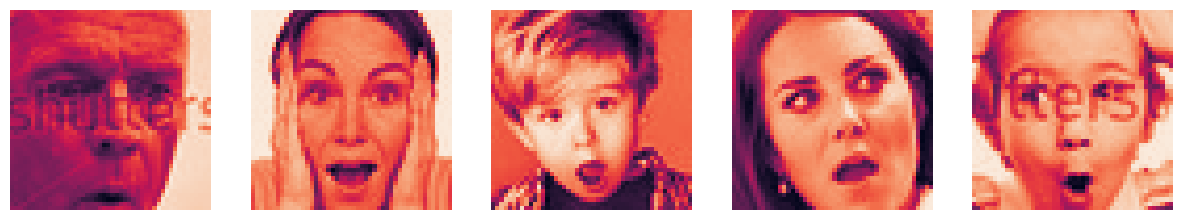

In [4]:
show_sample_images(TRAIN_PATH)

## 4. Class Combination Analysis

In facial expression recognition, some emotions can be difficult to distinguish and may share similar visual characteristics. In our dataset, we observe that 'disgust' and 'angry' expressions often share similar facial features and can be challenging to differentiate. Let's analyze the impact of combining these classes.

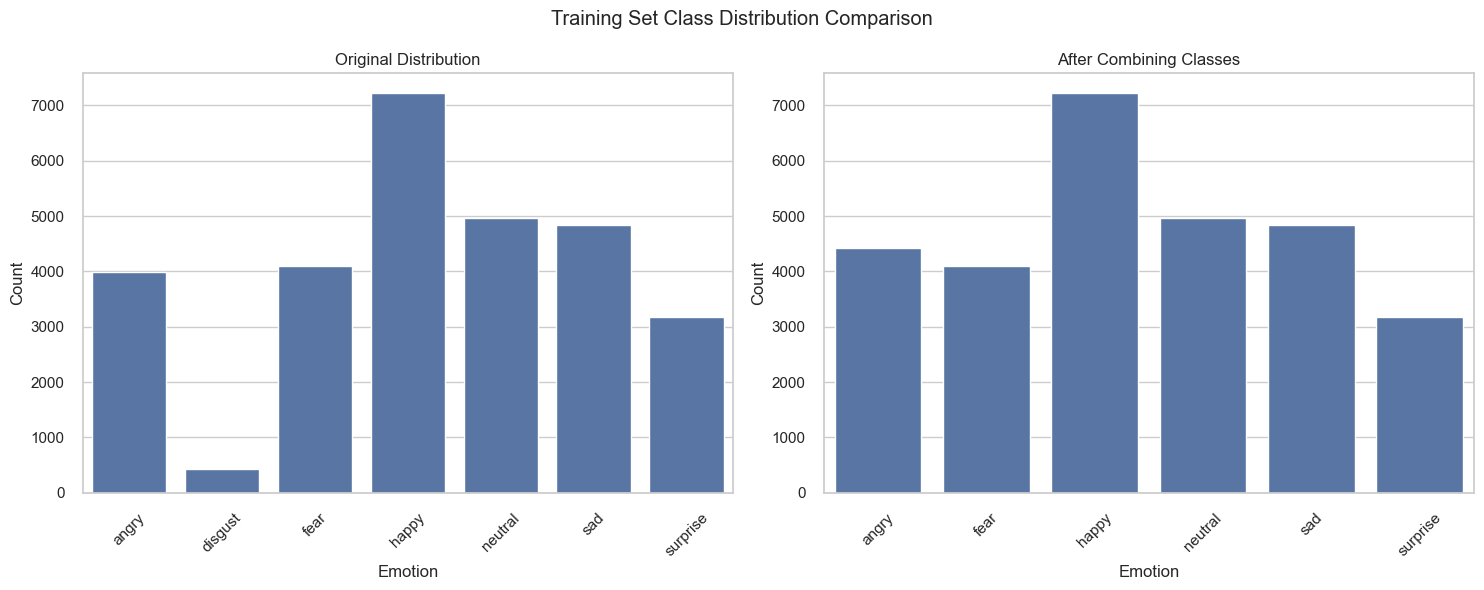

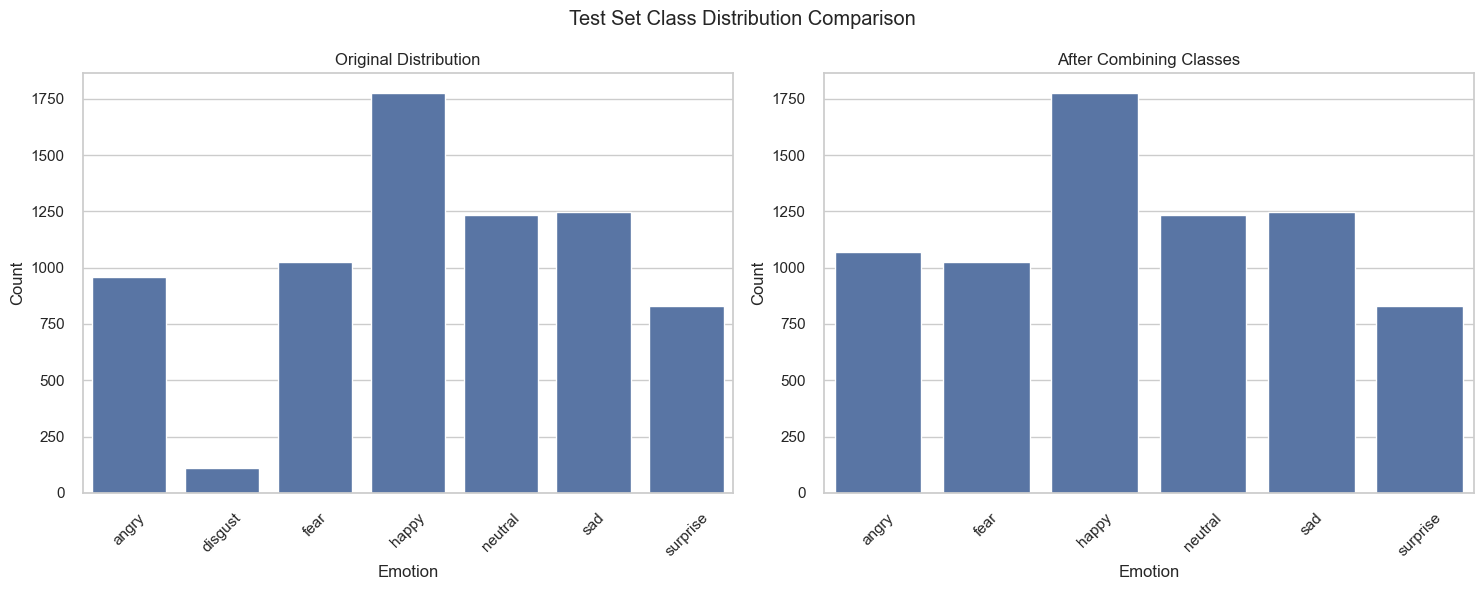

In [5]:
# Combine 'disgust' into 'angry' for both training and test sets
train_df_combined = combine_emotion_classes(train_df, 'disgust', 'angry')
test_df_combined = combine_emotion_classes(test_df, 'disgust', 'angry')

# Plot the comparison
plot_class_comparison(train_df, train_df_combined, 'Training Set Class Distribution Comparison')
plot_class_comparison(test_df, test_df_combined, 'Test Set Class Distribution Comparison')

In [6]:
# Print the combined distributions
print("Training Set Distribution (After Combining 'disgust' into 'angry'):")
print(train_df_combined)
print("\nTest Set Distribution (After Combining 'disgust' into 'angry'):")
print(test_df_combined)

Training Set Distribution (After Combining 'disgust' into 'angry'):
    Emotion  Count
0     angry   4431
2      fear   4097
3     happy   7215
4   neutral   4965
5       sad   4830
6  surprise   3171

Test Set Distribution (After Combining 'disgust' into 'angry'):
    Emotion  Count
0     angry   1069
2      fear   1024
3     happy   1774
4   neutral   1233
5       sad   1247
6  surprise    831


#### Reasons for Combining Classes:
1. **Similar Facial Features**: Both 'disgust' and 'angry' expressions often involve similar facial muscle movements, particularly around the eyebrows and mouth.
2. **Data Imbalance**: The 'disgust' class typically has fewer samples, which can lead to imbalanced training.
3. **Human Perception**: Humans sometimes struggle to distinguish between these emotions, suggesting they may share similar visual patterns.
4. **Model Performance**: Combining these classes can potentially improve model performance by reducing confusion between similar expressions.

## 5. Handling Corrupted or Blank Images

During data exploration, we may encounter images that are completely black, blank, or corrupted. These images do not provide useful information for model training and can negatively impact performance. 

**Steps:**
1. **Detect suspect images:** We identify images with very low pixel variance (almost all pixels are the same value), which are likely to be blank or corrupted.
2. **Visual inspection:** Before removing or filtering out these images, we visually inspect them to ensure we are not excluding valid but dark images.
3. **Filter DataFrames:** Instead of deleting files, we filter our DataFrames to exclude these suspect images, ensuring our analysis and modeling use only valid data.

In [ ]:
# Detect suspect images
suspect_images = []

for base_path in [TRAIN_PATH, TEST_PATH]:
    for emotion in os.listdir(base_path):
        emotion_path = os.path.join(base_path, emotion)
        if os.path.isdir(emotion_path):
            suspect_images.extend(find_blank_images(emotion_path))

print(f"Found {len(suspect_images)} suspect images.")

Found 14 suspect images.



Displaying 14 images from provided list:


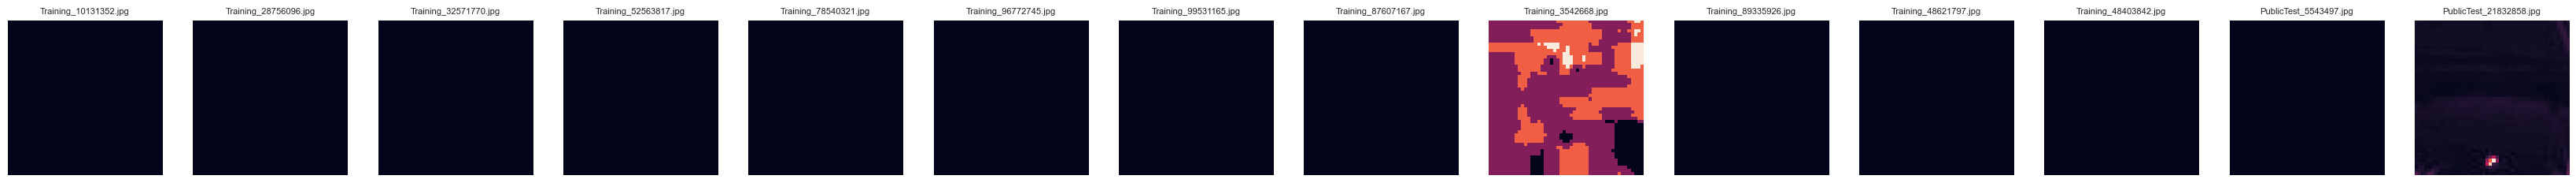

In [9]:
show_sample_images(suspect_images, num_samples=14)

In [ ]:
# Get the set of suspect filenames 
suspect_filenames = set(os.path.basename(path) for path in suspect_images)

# Filter train_df and test_df to remove suspect images
filtered_train_df = train_df[~train_df['filename'].isin(suspect_filenames)].reset_index(drop=True)
filtered_test_df = test_df[~test_df['filename'].isin(suspect_filenames)].reset_index(drop=True)

print(f"Original train_df: {len(train_df)} rows")
print(f"Filtered train_df: {len(filtered_train_df)} rows")
print(f"Original test_df: {len(test_df)} rows")
print(f"Filtered test_df: {len(filtered_test_df)} rows")

In [ ]:
# Create a list of filtered image paths for train and test sets
filtered_train_image_paths = [
    os.path.join(TRAIN_PATH, row['Emotion'], row['filename'])
    for _, row in filtered_train_df.iterrows()
]
filtered_test_image_paths = [
    os.path.join(TRAIN_PATH, row['Emotion'], row['filename'])
    for _, row in filtered_train_df.iterrows()
]

In [10]:
# for img_file in suspect_images:
#     os.remove(img_file)
# print(f"Removed {len(suspect_images)} images.")

Removed 14 images.


## 6. Image Statistics

Let's analyze the dimensions and other characteristics of the images in our dataset.

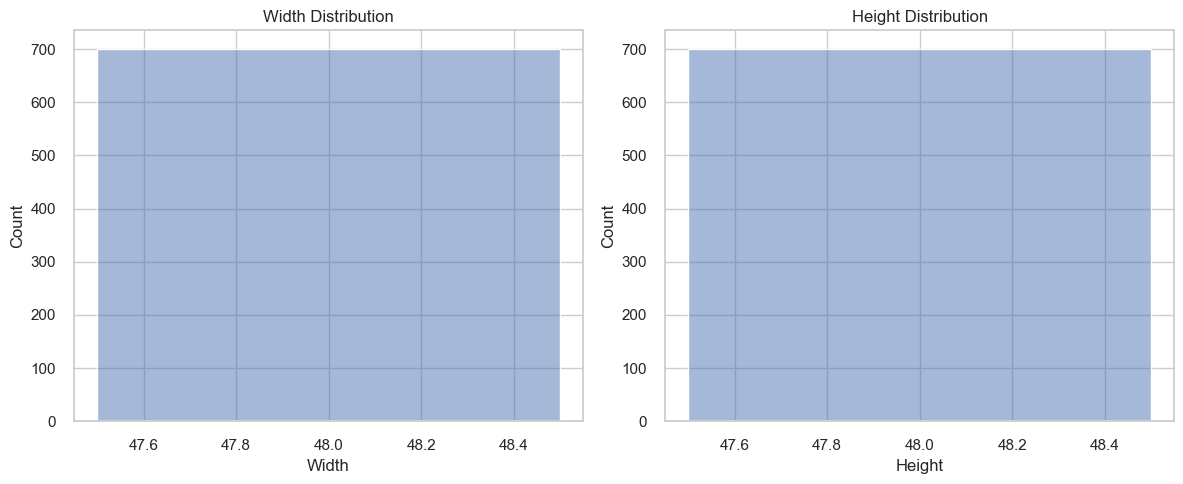

Image Dimension Statistics:
       Width  Height
count  700.0   700.0
mean    48.0    48.0
std      0.0     0.0
min     48.0    48.0
25%     48.0    48.0
50%     48.0    48.0
75%     48.0    48.0
max     48.0    48.0


In [11]:
analyze_image_dimensions(TRAIN_PATH)

## 7. Color Distribution Analysis

Let's analyze the color distribution (RGB histograms) of the images to understand the color characteristics of our dataset.

In [ ]:
analyze_color_distribution(TRAIN_PATH)

## 8. Pixel Value Distribution

Let's analyze the distribution of pixel values across the dataset to understand the overall brightness and contrast characteristics.

In [ ]:
analyze_pixel_distribution(TRAIN_PATH)